# Exercise: applying differential privacy by means of Python-DP library 
## Safety, Privacy and Legal Aspects - Master in Data Science (2022/2023)
### Name: ...................................................

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pydp as dp
from pydp.algorithms.laplacian import BoundedSum, Count, BoundedMean, Max, Min
import requests

# ... other libraries you may need

#### Download and read the widely known Stroke Prediction Dataset  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Remove NaN values and answer the following questions:

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df.dropna()
df = df.reset_index(drop=True)
print(df.shape)
df.head(3)

(4909, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


#### 1. Calculate using differential privacy (DP) for an epsilon value of your choice, how many women have suffered a stroke. And considering women aged 60 years and older? Repeat the same for men.

#### In both cases, compare the results with those obtained if DP is not applied.

In [3]:
epsilon = 0.5

In [27]:
#mujeres

df2 = df[df.gender == 'Female']
w_s = sum(df2.stroke.values)
x = BoundedSum(epsilon=epsilon,lower_bound=0, upper_bound=1)
w_s_dp=x.quick_result(df2.stroke.values)
print('women: '+str(w_s))
print('women_dp: '+str(w_s_dp))

women: 120
women_dp: 111


In [29]:
#mujeres mayores 60
df2 = df[(df.gender == 'Female') & (df.age >= 60)]
w_s = sum(df2.stroke.values)
x = BoundedSum(epsilon=epsilon,lower_bound=0, upper_bound=1)
w_s_dp=x.quick_result(df2.stroke.values)
print('women60: '+str(w_s))
print('women60_dp: '+str(w_s_dp))

women60: 84
women60_dp: 86


In [31]:
#hombres
df2 = df[df.gender == 'Male']
w_s = sum(df2.stroke.values)
x = BoundedSum(epsilon=epsilon,lower_bound=0, upper_bound=1)
w_s_dp=x.quick_result(df2.stroke.values)
print('men: '+str(w_s))
print('men_dp: '+str(w_s_dp))

men: 89
men_dp: 83


In [32]:
#hombres mayores 60
df2 = df[(df.gender == 'Male') & (df.age >= 60)]
w_s = sum(df2.stroke.values)
x = BoundedSum(epsilon=epsilon,lower_bound=0, upper_bound=1)
w_s_dp=x.quick_result(df2.stroke.values)
print('men60: '+str(w_s))
print('men60_dp: '+str(w_s_dp))

men60: 66
men60_dp: 70


#### 2. For all women who have suffered a stroke, calculate the mean BMI applying PD for a certain epsilon value.  Repeat the same for those who have not suffered a stroke. 

#### Compare the results with those obtained if DP is not applied.

In [33]:
femStroke = df[(df.gender == 'Female') & (df.stroke == 1)]
femNoStroke = df[(df.gender == 'Female') & (df.stroke == 0)]

bmiStroke = femStroke["bmi"]
bmiNoStroke = femNoStroke["bmi"]

meanStrokeNoDP=np.mean(bmiStroke)
meanNoStrokeNoDP=np.mean(bmiNoStroke)

In [34]:
x = BoundedMean(epsilon=epsilon, lower_bound=min(bmiStroke), upper_bound=max(bmiStroke),dtype='float')
meanStrokeDP=x.quick_result(list(bmiStroke))

x = BoundedMean(epsilon=epsilon, lower_bound=min(bmiNoStroke), upper_bound=max(bmiNoStroke),dtype='float')
meanNoStrokeDP=x.quick_result(list(bmiNoStroke))

In [57]:
print('meanNoStrokeNoDP: '+str(meanNoStrokeNoDP))
print('meanNoStrokeDP: '+str(meanNoStrokeDP))
print('meanStrokeNoDP: '+str(meanStrokeNoDP))
print('meanStrokeDP: '+str(meanStrokeDP))

meanNoStrokeNoDP: 29.015952466690674
meanNoStrokeDP: 28.801421005352246
meanStrokeNoDP: 30.21833333333333
meanStrokeDP: 29.130942374774477


#### 3. For all the people who have suffered a stroke, calculate (by applying PD) how many of them suffered from hypertension.  Repeat the same for those who have not suffered a stroke. 

#### Compare the results with those obtained if DP is not applied.

In [37]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [55]:
x = Count(epsilon=epsilon, dtype="int")

df1=df[(df['hypertension']==1)&(df['stroke']==1)]
countStrokeDP = x.quick_result(list(df1['hypertension']))

df2=df[(df['hypertension']==1)&(df['stroke']==0)]
countNoStrokeDP = x.quick_result(list(df2['hypertension']))

In [56]:
print('cuentas de hipertensión por grupos:')
print('countNoStrokeNoDP: '+str(df2.shape[0]))
print('countNoStrokeDP: '+str(countNoStrokeDP))
print('countStrokeNoDP: '+str(df1.shape[0]))
print('countStrokeDP: '+str(countStrokeDP))

cuentas de hipertensión por grupos:
countNoStrokeNoDP: 391
countNoStrokeDP: 382
countStrokeNoDP: 60
countStrokeDP: 54


#### 4. Calculate the avgerage glucose level of all the people who have suffered a stroke. Compare this result graphically with that obtained by applying DP as a function of the epsilon value introduced (e.g., you can test what happens even with epsilon values higher than 1, epsilon = [0.1, 0.2, 0.3,...,10]). 

#### What property of differential privacy and the privacy budget (epsilon) do you see reflected in this case?

In [58]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [61]:
dfStroke=df[df['stroke']==1]
glucosa = dfStroke['avg_glucose_level']
avgGlucose = np.mean(dfStroke['avg_glucose_level'])

In [63]:
epsVal = np.arange(0.1,10+0.1,0.1) #valores de epsilon
meanGlucosa = np.full(len(epsVal), np.nan)
for i in np.arange(len(epsVal)):
    x = BoundedMean(epsilon=epsVal[i], lower_bound=min(glucosa), upper_bound=max(glucosa),dtype='float')
    meanGlucosa[i]=x.quick_result(list(glucosa))

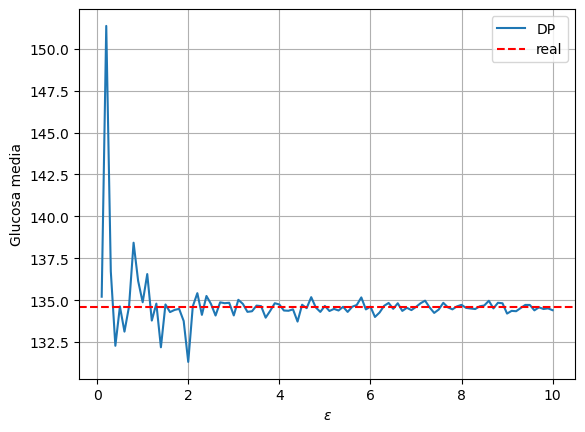

In [66]:
fig, ax = plt.subplots()

ax.plot(epsVal,meanGlucosa, label='DP')
ax.axhline(y=avgGlucose, color='red', linestyle='--', label='real')

ax.set_xlabel('$\epsilon$')
ax.set_ylabel('Glucosa media')

ax.legend()

plt.grid(True)
plt.show()

Vemos que la precisión del cálculo de la media depende del valor de epsilon. En concreto, se comete más error, a cambio de un mayor nivel de privacidad, para valores de epsilon bajos, mientras que el valor de la media calculado con DP tiende al valor real a medida que epsilon tiende a infinito.

#### 5. Compare by means of bar charts the total number of people who have suffered a stroke according to the age range grouped in intervals of 20 years. Compare in each case the result obtained without applying differential privacy and the one obtained by applying DP for a pre-fixed epsilon value.

In [4]:
#plot del numero de casos con el valor de epsilon fijado al principio de la practica

#inicializar vectores
limEdad = np.arange(0,100+20,20)
numReal = np.full(len(limEdad)-1, np.nan)
numDP = np.full(len(limEdad)-1, np.nan)

In [5]:
#contamos numero de strokes por intervalo
x = Count(epsilon=epsilon, dtype="int")
for i in np.arange(len(limEdad)-1):
    dfaux=df[(df['age']>=limEdad[i])&(df['age']<limEdad[i+1])]
    numReal[i]= np.sum(dfaux['stroke'])
    numDP[i]  = x.quick_result(list(dfaux[dfaux['stroke']==1]['stroke']))

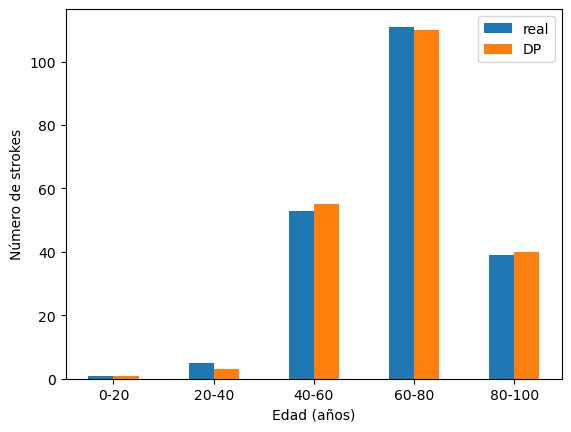

In [11]:
values = limEdad[0:5]
frequencies1 = numReal
frequencies2 = numDP
value_labels = ['0-20','20-40','40-60','60-80','80-100']

bar_width = 5

plt.bar(np.array(values) - bar_width/2, frequencies1, bar_width, label='real')
plt.bar(np.array(values) + bar_width/2, frequencies2, bar_width, label='DP')

plt.xlabel('Edad (años)')
plt.ylabel('Número de strokes')
plt.xticks(values, value_labels)
# plt.title('Bar Plot of Values and Frequencies')
plt.legend()

plt.show()